# Ejercicio 3

El objetivo de este ejercicio es que el estudiante aplique modelos ensemble y SVC a un dataset real. Además, que el estudiante pueda analizar las características del dataset y las salidas de los modelos.

## Ejercicio 3.1

Ejecute el siguiente código y analice la estructura del dataset. Fíjese en la cantidad de datos de entrenamiento existentes, número de atributos, valores máximos, mínimos, correlaciones entre variables, dispersión, etc.

In [56]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
import matplotlib.pylab as plt
from matplotlib import style
import seaborn as sns
sns.set()
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline as pipe


In [57]:
HOW_SCALE = "minmax"  # standard|minmax  como re-escalar los atributos

In [58]:
df = pd.read_csv("vehicle.csv")
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [59]:
len(df)

846

In [60]:
#df=df[["ELONGATEDNESS","MAX.LENGTH ASPECT RATIO","SCALED VARIANCE_MINOR","COMPACTNESS","CIRCULARITY","SCATTER RATIO","PR.AXIS RECTANGULARITY","Class"]]
#df.head()

#df=df[["RADIUS RATIO","PR.AXIS ASPECT RATIO","MAX.LENGTH ASPECT RATIO","SCATTER RATIO","ELONGATEDNESS","PR.AXIS RECTANGULARITY","SCALED VARIANCE_MAJOR","SCALED VARIANCE_MINOR" ,"SKEWNESS ABOUT_MAJOR","SKEWNESS ABOUT_MINOR" ,"KURTOSIS ABOUT_MAJOR","Class"]]
#df.head()

In [61]:
#nuevo = newData.transpose()
#nuevo.to_csv('analisis.csv',index=True, header=True)

In [7]:
df.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY', 'RADIUS RATIO',
       'PR.AXIS ASPECT RATIO', 'MAX.LENGTH ASPECT RATIO', 'SCATTER RATIO',
       'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY',
       'SCALED VARIANCE_MAJOR', 'SCALED VARIANCE_MINOR',
       'SCALED RADIUS OF GYRATION', 'SKEWNESS ABOUT_MAJOR',
       'SKEWNESS ABOUT_MINOR', 'KURTOSIS ABOUT_MAJOR', 'KURTOSIS ABOUT_MINOR',
       'HOLLOWS RATIO', 'Class'],
      dtype='object')

In [8]:
len(df.columns)

19

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

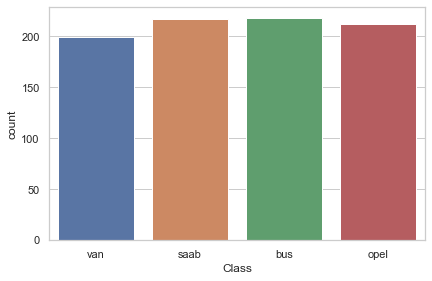

In [9]:
sns.countplot(data=df, x='Class')
df['Class'].value_counts()

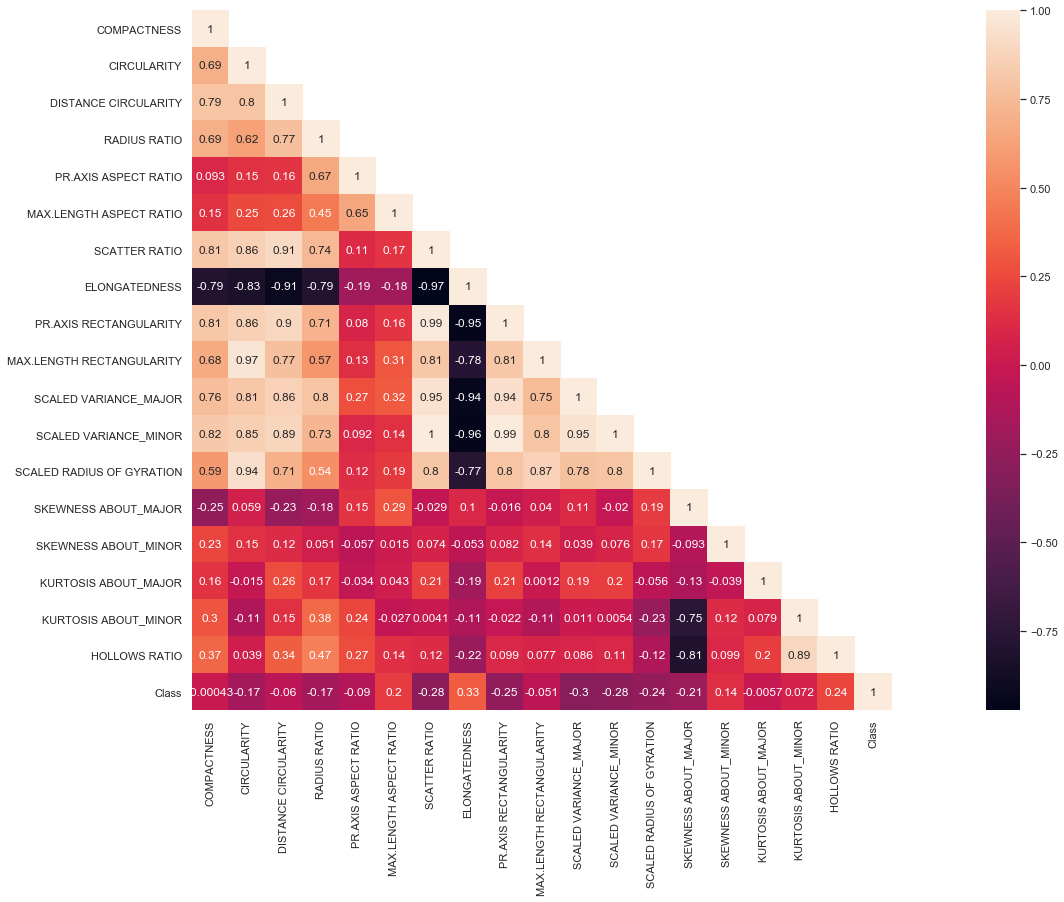

In [10]:
df.Class = df.Class.astype('category').cat.codes

# genera la matriz de correlaciones entre atributos
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [11]:
cor_mat

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,Class
COMPACTNESS,1.000000,0.692869,0.792444,0.691659,0.093222,0.148249,0.813003,-0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,-0.252984,0.233693,0.156779,0.297780,0.365552,-0.000434
CIRCULARITY,0.692869,1.000000,0.798492,0.622778,0.149692,0.247467,0.860367,-0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,-0.015482,-0.113047,0.038677,-0.174246
DISTANCE CIRCULARITY,0.792444,0.798492,1.000000,0.771644,0.161529,0.264309,0.907280,-0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,-0.231660,0.116478,0.264522,0.147980,0.335453,-0.059804
RADIUS RATIO,0.691659,0.622778,0.771644,1.000000,0.665407,0.448048,0.738460,-0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,-0.182412,0.050534,0.174299,0.380757,0.469278,-0.173949
PR.AXIS ASPECT RATIO,0.093222,0.149692,0.161529,0.665407,1.000000,0.648096,0.106064,-0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152304,-0.056807,-0.034180,0.238195,0.267381,-0.090462
MAX.LENGTH ASPECT RATIO,0.148249,0.247467,0.264309,0.448048,0.648096,1.000000,0.166769,-0.180044,0.161861,0.305943,0.319430,0.144606,0.189791,0.294548,0.015218,0.043379,-0.027317,0.143919,0.195172
SCATTER RATIO,0.813003,0.860367,0.907280,0.738460,0.106064,0.166769,1.000000,-0.973385,0.992088,0.810648,0.951862,0.996318,0.800932,-0.028618,0.074347,0.210706,0.004053,0.119950,-0.280903
ELONGATEDNESS,-0.788647,-0.828755,-0.912307,-0.792557,-0.185086,-0.180044,-0.973385,1.000000,-0.950512,-0.775531,-0.938392,-0.956522,-0.766146,0.104875,-0.053346,-0.185189,-0.112046,-0.216725,0.326903
PR.AXIS RECTANGULARITY,0.813437,0.857925,0.895326,0.711497,0.079982,0.161861,0.992088,-0.950512,1.000000,0.813305,0.938266,0.992346,0.798282,-0.016333,0.082346,0.213088,-0.022056,0.098519,-0.249787
MAX.LENGTH RECTANGULARITY,0.676143,0.965776,0.774524,0.570154,0.129168,0.305943,0.810648,-0.775531,0.813305,1.000000,0.747152,0.798071,0.866479,0.040339,0.137473,0.001183,-0.107718,0.076770,-0.050632


In [12]:
# creando las variables `X` y `y`
X = df.drop("Class", axis=1).to_numpy()
y = df["Class"].to_numpy()

In [13]:
if HOW_SCALE == "standard":
    scaler=StandardScaler()
    X = scaler.fit_transform(X)
elif HOW_SCALE == "minmax":
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

In [14]:
def mostrar_dataset(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    
    reduccion = TSNE(n_components=2, init='pca')
    x_new = reduccion.fit_transform(X)
    tmp_df = pd.DataFrame(np.column_stack([x_new, y]))
    tmp_df.columns = ["x1", "x2", "Y"]
    
    sns.scatterplot(x="x1", y="x2", hue="Y", data=tmp_df, ax=ax)    

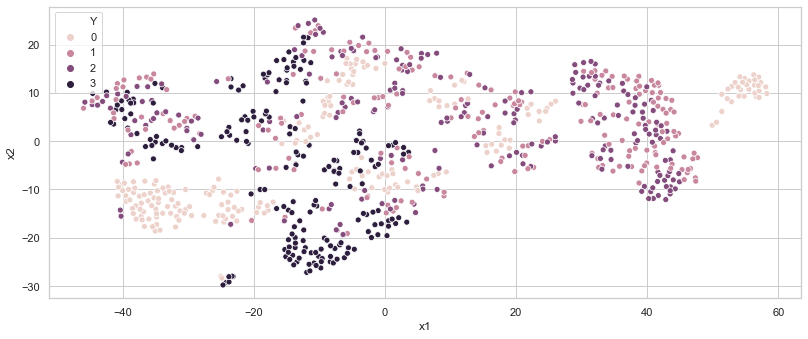

In [15]:
mostrar_dataset(X, y)

In [19]:
#Reducir la dimensionalidad


x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=1)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)


¿Hay alguna característica importante en el dataset que se deba mencionar?

## Ejercicio 3.2

Ingrese manualmente hyper-parámetros para los siguientes modelos. Además, en los modelos RF y XGBoost, fíjese en el gráfico donde se muestran la importancia de las variables para esos modelos.

Genere un gráfico comparando los valores de `accuracy` para los modelos

In [20]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)
pred = clf_dt.predict(x_test)
print("Decision Tree: {:.3f}".format(accuracy_score(pred,y_test)))

Decision Tree: 0.582


In [21]:
#n_estimators es el numero de arboles a construir 


clf_rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=5,n_jobs=4)
clf_rf.fit(x_train, y_train)
pred = clf_rf.predict(x_test)
print("Random Forest: {:.3f}".format(accuracy_score(pred,y_test)))

Random Forest: 0.582


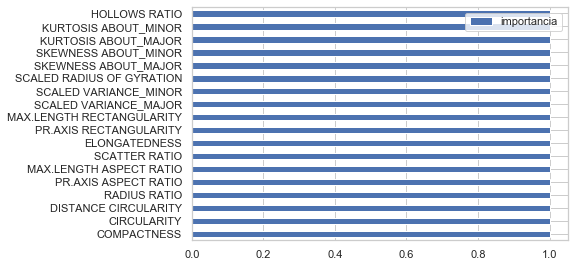

In [22]:
# importancia de variables para RandomForest
tmp = {
    "variables": df.drop("Class", axis=1).columns,
    "importancia": clf_rf.feature_importances_
}

pd.DataFrame(tmp, index=tmp["variables"]).plot(kind="barh")

In [23]:
def grafica(xlabel,ylabel,xvalores,yvalores):
    plt.plot(xvalores, yvalores)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print("AdaBoost: {:.3f}".format(accuracy_score(pred, y_test)))



AdaBoost: 0.600


In [24]:
#df = pd.DataFrame({"learning_rate": valores, "Acurracy": predicciones})
#df

In [25]:
clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=5, max_depth=5, learning_rate=0.8)
clf_gb.fit(x_train, y_train)
pred = clf_gb.predict(x_test)
print("Gradient Boost: {:.3f}".format(accuracy_score(pred,y_test)))


Gradient Boost: 0.582


In [26]:
#df = pd.DataFrame({"learning_rate": valores, "Acurracy": predicciones})
#df

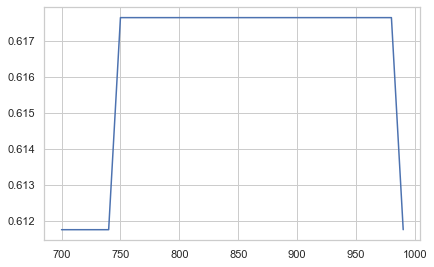

In [35]:
predicciones = []
#pasos = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#pasos = range(1,10,1)
pasos = range(700,1000,10)

#
for i in pasos:
    #clf_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=500)
    clf_xgb = xgb.XGBClassifier(learning_rate=0.4, max_depth=1, n_estimators=900)
    clf_xgb.fit(x_train, y_train)
    pred = clf_xgb.predict(x_test)
    predicciones.append(accuracy_score(pred,y_test))
    #print("XG Boost: {:.3f}".format(accuracy_score(pred,y_test)))
    
plt.plot(pasos,predicciones)
plt.show()


In [55]:
 clf_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=1, n_estimators=700)
clf_xgb.fit(x_train, y_train)
pred = clf_xgb.predict(x_test)
#predicciones.append(accuracy_score(pred,y_test))
print("XG Boost: {:.3f}".format(accuracy_score(pred,y_test)))

XG Boost: 0.612


In [ ]:
#valores =valores
#df = pd.DataFrame({"learning_rate": valores, "Acurracy": predicciones})
#df

In [ ]:
# importancia de variables para el modelo XBoost
tmp = {
    "variables": df.drop("Class", axis=1).columns,
    "importancia": clf_xgb.feature_importances_
}

pd.DataFrame(tmp, index=tmp["variables"]).plot(kind="barh")

### Tuneando parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid,refit=True, verbose=2,n_jobs=-1)  # verbose se usa solo para efectos de demostración
grid.fit(x_train, y_train)

In [ ]:
# el mejor modelo aprendido
print(grid.best_estimator_)

In [45]:

clf_svc = SVC(C=10, gamma=0.01,kernel='rbf')
clf_svc.fit(x_train, y_train)
pred = clf_svc.predict(x_test)
print("SVC: {:.3f}".format(accuracy_score(pred,y_test)))
#predicciones.append(accuracy_score(pred,y_test))


SVC: 0.612


In [ ]:
#df = pd.DataFrame({"gamma": valores, "Acurracy": predicciones})
#df

## Ejercicio 3.3

Seleccione los 2 modelos con mejores prestaciones para este problema e intente mejorar su `accuracy`

Nota: Realice un tuneado de hyper-parámetros. Además, pruebe si el re-escalamiento estandar ayuda a algún modelo. 

## Ejercicio 3.4

Considerando el análisis de correlaciones entre variables en el dataset y la importancia de variables para los modelos de XGBoost y Random Forest, ¿Que se podría hacer para mejorar el `accuracy` para este dataset?

## Ejercicio 3.5

Linear Discriminant Analysis (LDA) es una técnica para transformación de datos, cuyo objetivo es maximizar la separación entre 2 clases creando distribuciones gausianas. La documentación de este método se encuentra en https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

Para este ejercicio, probar LDA para reducir dimensiones del dataset y entrenar 2 modelos: SVC y XGBoost. ¿Que `accuracy` logra encontrar ahora y a cuantas dimensiones se redujo el problema?